In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
df = pd.read_csv("teleconnect.csv")

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


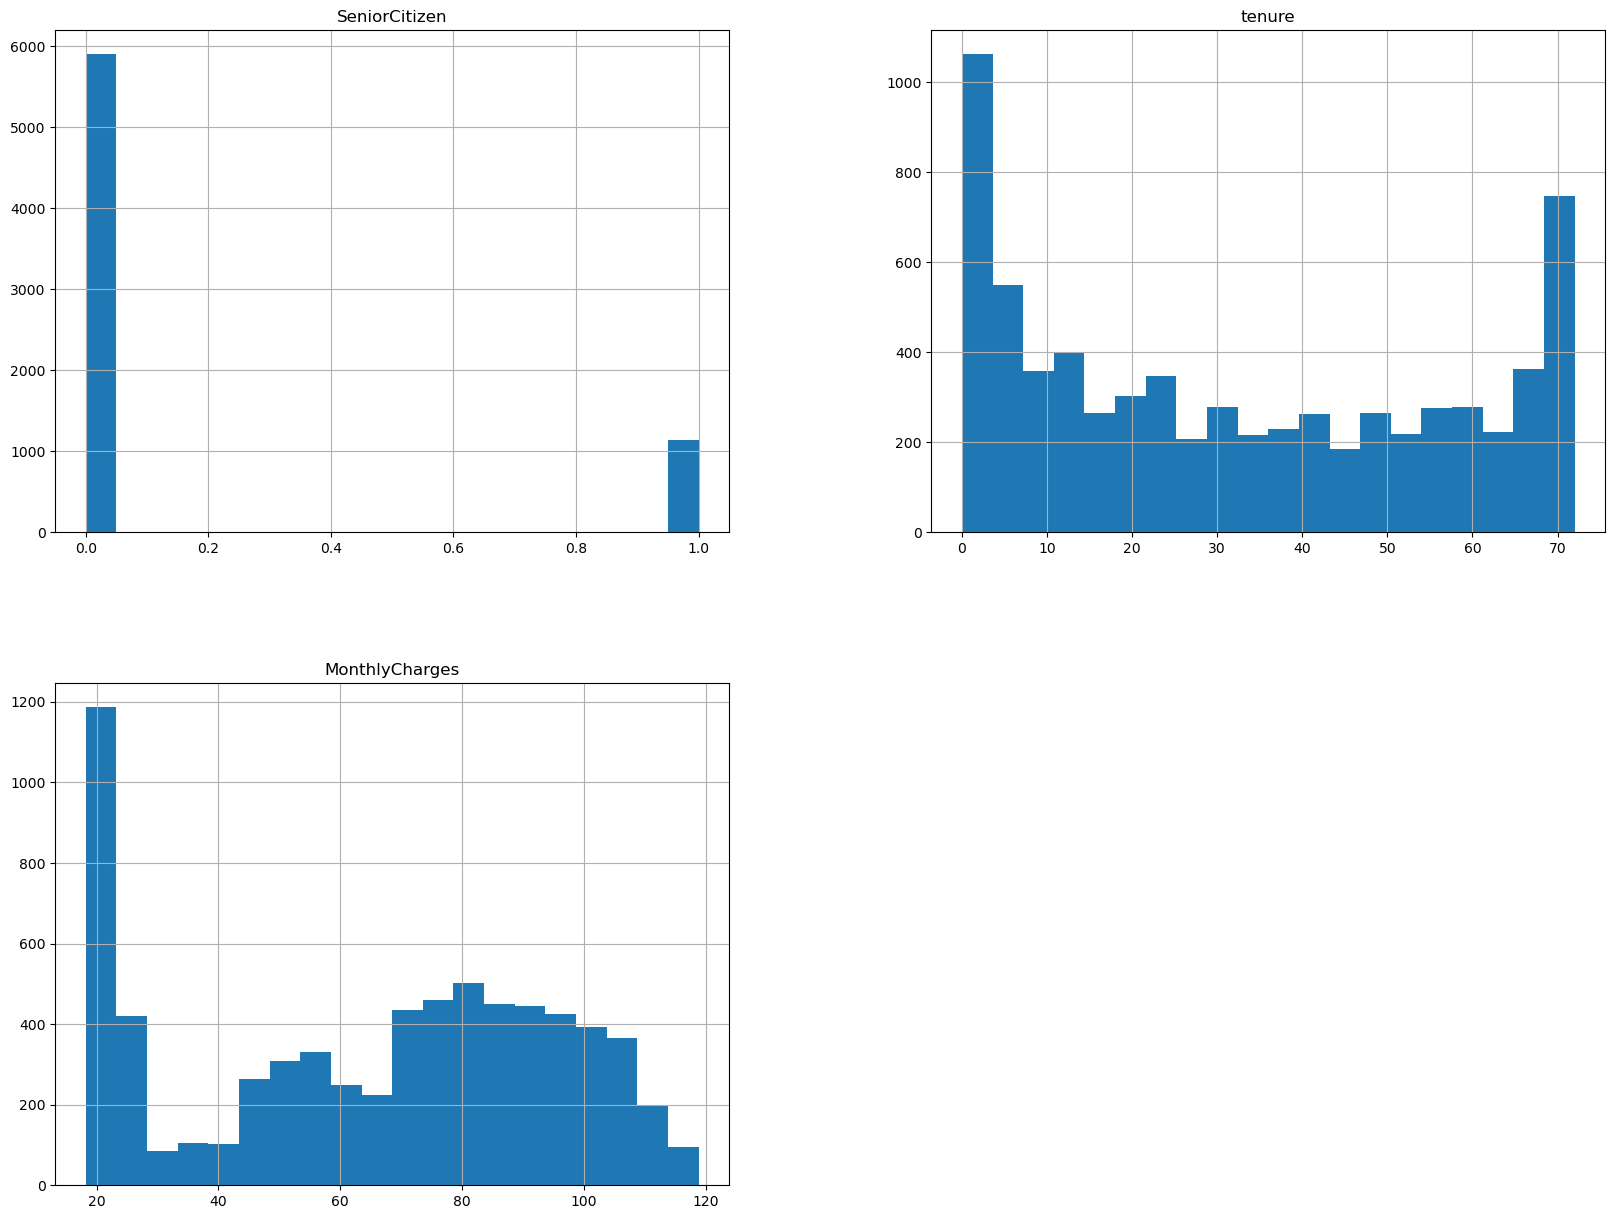

In [22]:
# Plot distribution of key features
import seaborn as sns
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(20,15))
plt.show()

In [26]:
# Cleaning the 'TotalCharges' column by converting it to numeric and handling errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [30]:
# Filling missing values in 'TotalCharges' with the median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Exploratory Data Analysis

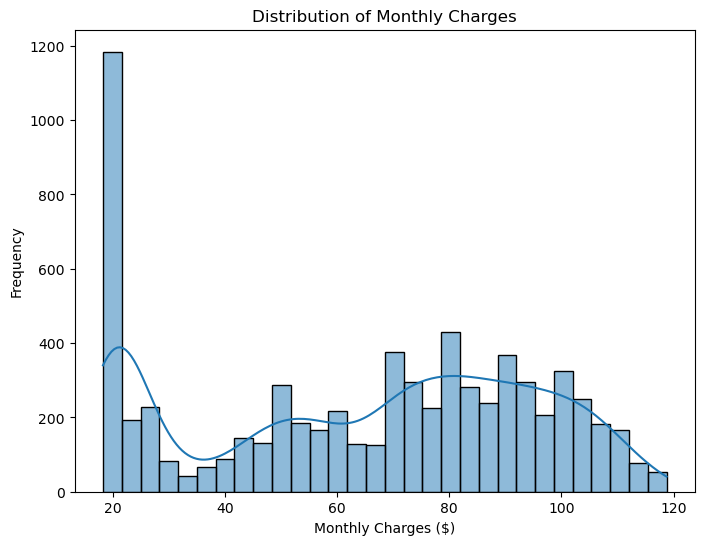

In [32]:
# Distribution of Monthly Charges
plt.figure(figsize=(8, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.show()

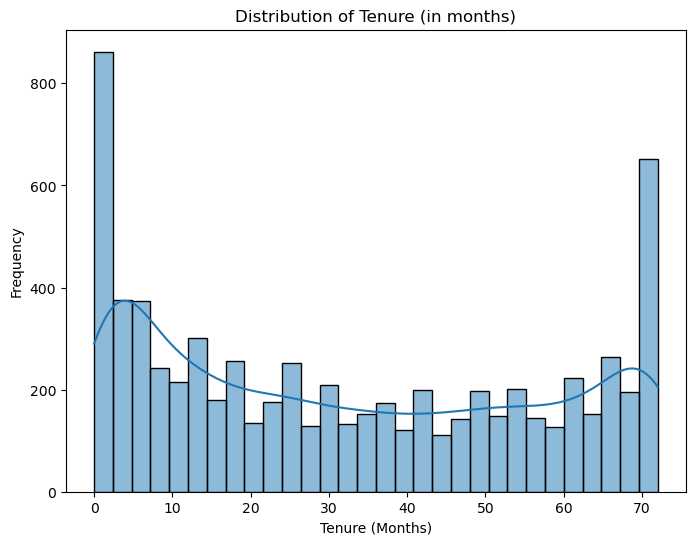

In [34]:
# Distribution of Tenure
plt.figure(figsize=(8, 6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure (in months)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

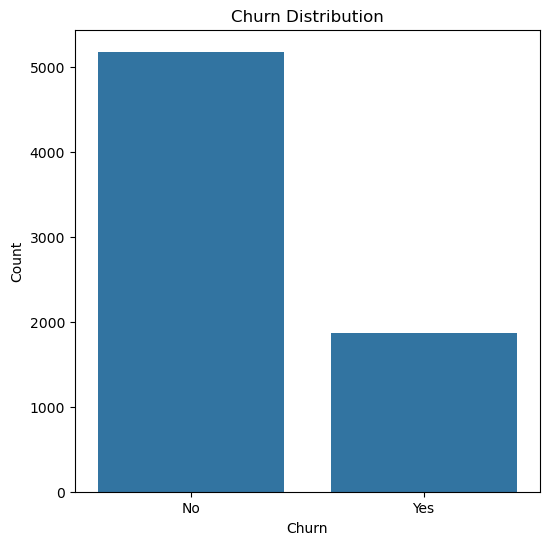

In [36]:
# Churn Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.ylabel('Count')
plt.show()

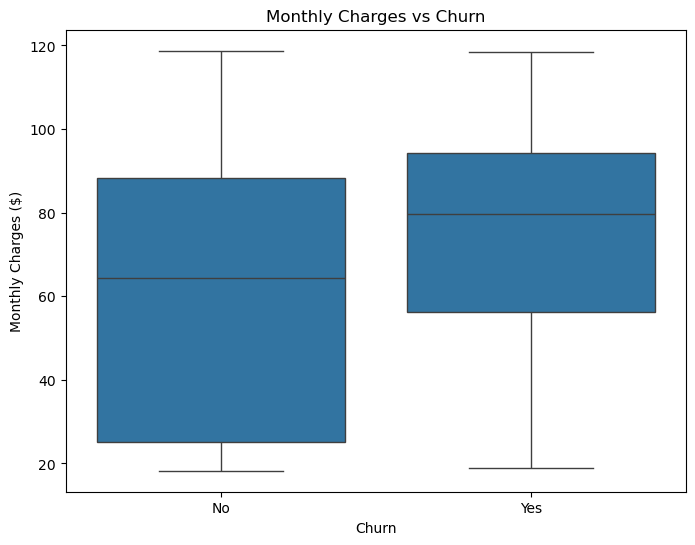

In [38]:
# Monthly Charges vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.ylabel('Monthly Charges ($)')
plt.show()

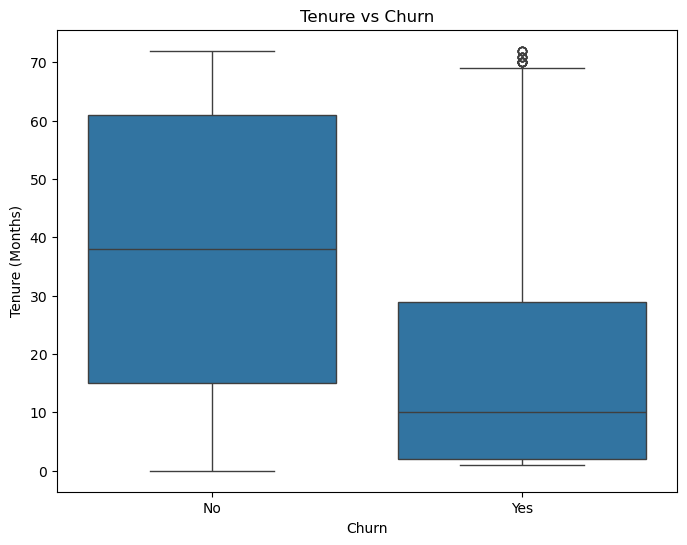

In [40]:
# Tenure vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.ylabel('Tenure (Months)')
plt.show()

In [44]:
# Encode categorical variables
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [46]:
# Encode binary variables
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [48]:
# Define features (X) and target (y)
X = df.drop(columns=['customerID', 'Churn'])  # 'Churn' is the target
y = df['Churn']

In [50]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

In [64]:
# Build the model
model = Sequential()

# Explicit input layer
model.add(Input(shape=(X_train.shape[1],)))

# Hidden layers
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))

# Output layer (binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape         ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense_3 (Dense)             │ (None, 16)           │         320 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_4 (Dense)             │ (None, 8)            │         136 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_5 (Dense)             │ (None, 1)            │           9 │
└─────────────────────────────┴──────────────────────┴─────────────┘

 Total params: 465 (1.82 KB)

 Trainable params: 465 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4613 - loss: 0.7682 - val_accuracy: 0.7473 - val_loss: 0.5028
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7532 - loss: 0.4957 - val_accuracy: 0.7634 - val_loss: 0.4555
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7619 - loss: 0.4711 - val_accuracy: 0.7728 - val_loss: 0.4405
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7893 - loss: 0.4408 - val_accuracy: 0.7785 - val_loss: 0.4328
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7838 - loss: 0.4410 - val_accuracy: 0.7823 - val_loss: 0.4275
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7939 - loss: 0.4298 - val_accuracy: 0.7894 - val_loss: 0.4243
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7839 - loss: 0.4365 - val_accuracy: 0.7946 - val_loss: 0.4222
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8008 - loss: 0.4193 - val_accuracy: 0.

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8001 - loss: 0.4201
Test Accuracy: 0.7950780987739563


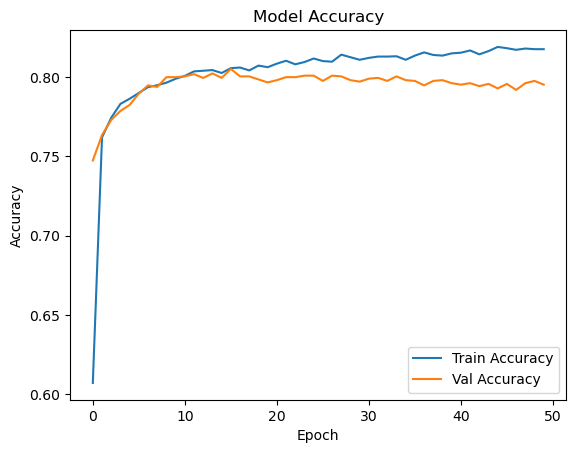

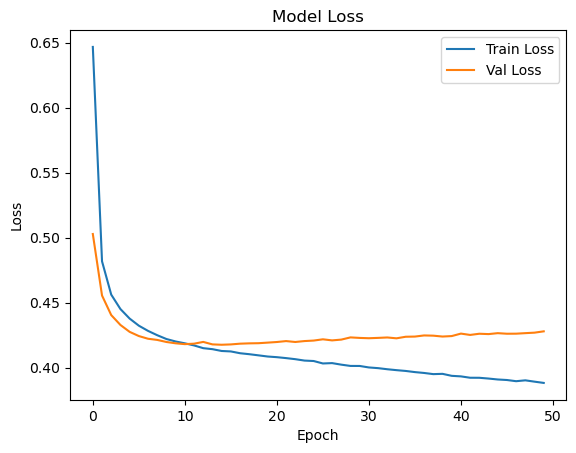

In [68]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Plot training history
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [70]:
# Import required libraries
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better optimization performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply RobustScaler to scale the features (handle outliers)
#from sklearn.preprocessing import RobustScaler
#scaler = RobustScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Ensure X_train is a NumPy array
X_train = np.array(X_train)
# Ensure y_train is a NumPy array and contains integers (0 and 1)
y_train = np.array(y_train).astype(int)

# Function to build the ANN model
def build_ann_model(optimizer):
    model = Sequential()
    model.add(tf.keras.layers.InputLayer(shape=(X_train_scaled.shape[1],)))  # Input layer
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Choose optimization algorithms
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD with Momentum': SGD(learning_rate=0.01, momentum=0.9),
    'RMSProp': RMSprop(learning_rate=0.001)
}

# Evaluate model with each optimizer
results = {}

for name, optimizer in optimizers.items():
    print(f"Training with optimizer: {name}")
    
    # Build and train the model
    model = build_ann_model(optimizer)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    
    # Evaluate the model on test data
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = model.evaluate(X_test, y_test)[1]
    
    # Store the results
    results[name] = {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }
    print(f"{name} Accuracy: {accuracy}\n")

# Display results
for name, result in results.items():
    print(f"Optimizer: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print("\n")




Training with optimizer: Adam


C:\Users\layin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7882 - loss: 0.4854
Adam Accuracy: 0.7948899865150452

Training with optimizer: SGD with Momentum


C:\Users\layin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7820 - loss: 0.5083
SGD with Momentum Accuracy: 0.7792760729789734

Training with optimizer: RMSProp


C:\Users\layin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7673 - loss: 0.4788
RMSProp Accuracy: 0.7877927422523499

Optimizer: Adam
Accuracy: 0.7948899865150452
Confusion Matrix:
[[933 103]
 [186 187]]
Classification Report:
{'0': {'precision': 0.8337801608579088, 'recall': 0.9005791505791506, 'f1-score': 0.8658932714617169, 'support': 1036.0}, '1': {'precision': 0.6448275862068965, 'recall': 0.5013404825737265, 'f1-score': 0.5641025641025641, 'support': 373.0}, 'accuracy': 0.794889992902768, 'macro avg': {'precision': 0.7393038735324027, 'recall': 0.7009598165764386, 'f1-score': 0.7149979177821405, 'support': 1409.0}, 'weighted avg': {'precision': 0.7837593586259518, 'recall': 0.794889992902768, 'f1-score': 0.7860011963410896, 'support': 1409.0}}


Optimizer: SGD with Momentum
Accuracy: 0.7792760729789734
Confusion Matrix:
[[933 103]
 [208 165]]
Classification Report:
{'0': {'precision': 0.8177037686240141, 'recall': 0.9005791505791506, 'f1-score': 0.

In [74]:
import numpy as np
from sklearn.utils import class_weight

# Calculate the class weights based on the distribution of the labels
class_weights = class_weight.compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)

# Convert to dictionary format
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class Weights: {class_weights_dict}")


Class Weights: {0: 0.680763653939101, 1: 1.8830213903743316}


In [80]:
# Ensure X_train_scaled is a NumPy array
X_train = np.array(X_train)
# Ensure y_train is a NumPy array and contains integers (0 and 1)
y_train = np.array(y_train).astype(int)

In [86]:
# Rebuild the model (same architecture as before)
model = Sequential()
model.add(tf.keras.layers.InputLayer(shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    class_weight=class_weights_dict)


Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6124 - loss: 0.7114 - val_accuracy: 0.6721 - val_loss: 0.5888
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6731 - loss: 0.5547 - val_accuracy: 0.7119 - val_loss: 0.5441
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7146 - loss: 0.5292 - val_accuracy: 0.7275 - val_loss: 0.5237
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7243 - loss: 0.5124 - val_accuracy: 0.7339 - val_loss: 0.5119
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7208 - loss: 0.5067 - val_accuracy: 0.7395 - val_loss: 0.5037
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7330 - loss: 0.5039 - val_accuracy: 0.7452 - val_loss: 0.4953
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7420 - loss: 0.4976 - val_accuracy: 0.7502 - val_loss: 0.4907
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7333 - loss: 0.5075 - val_accuracy: 0.

Test Accuracy with Class Weights: 0.7586941123008728
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


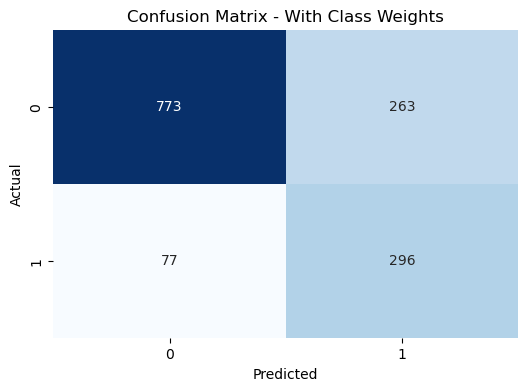

Classification Report with Class Weights:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1036
           1       0.53      0.79      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



In [88]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy with Class Weights: {test_acc}")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - With Class Weights")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report with Class Weights:")
print(classification_report(y_test, y_pred))


Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7520 - loss: 0.6769 - val_accuracy: 0.7644 - val_loss: 0.4636
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7717 - loss: 0.6467 - val_accuracy: 0.7672 - val_loss: 0.4646
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7544 - loss: 0.6728 - val_accuracy: 0.7644 - val_loss: 0.4683
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7569 - loss: 0.6766 - val_accuracy: 0.7665 - val_loss: 0.4628
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7620 - loss: 0.6797 - val_accuracy: 0.7658 - val_loss: 0.4684
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7621 - loss: 0.6700 - val_accuracy: 0.7679 - val_loss: 0.4608
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7776 - loss: 0.6434 - val_accuracy: 0.7686 - val_loss: 0.4685
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7694 - loss: 0.6583 - val_accuracy: 0.

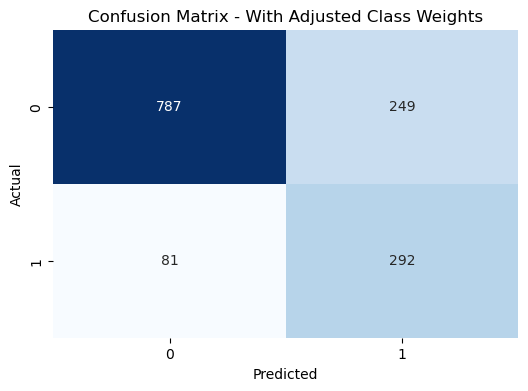

Classification Report with Adjusted Class Weights:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1036
           1       0.54      0.78      0.64       373

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409



In [90]:
# Slightly adjust the class weights
# Here, we reduce the weight of the minority class (churners) a bit
class_weights_dict = {0: 1.0, 1: 2.5}  # Adjust class weights to reduce false positives

# Train the model with the new class weights
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    class_weight=class_weights_dict)

# Evaluate the model again
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy with Adjusted Class Weights: {test_acc}")

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - With Adjusted Class Weights")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report with Adjusted Class Weights:")
print(classification_report(y_test, y_pred))


Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5463 - loss: 1.2901 - val_accuracy: 0.7246 - val_loss: 0.7712
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6401 - loss: 1.0816 - val_accuracy: 0.7189 - val_loss: 0.7063
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6613 - loss: 0.9871 - val_accuracy: 0.7324 - val_loss: 0.6557
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6780 - loss: 0.9497 - val_accuracy: 0.7346 - val_loss: 0.6180
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6960 - loss: 0.9174 - val_accuracy: 0.7402 - val_loss: 0.5902
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7168 - loss: 0.8741 - val_accuracy: 0.7424 - val_loss: 0.5684
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7161 - loss: 0.8563 - val_accuracy: 0.7523 - val_loss: 0.5481
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7368 - loss: 0.8375 - val_accuracy: 0.

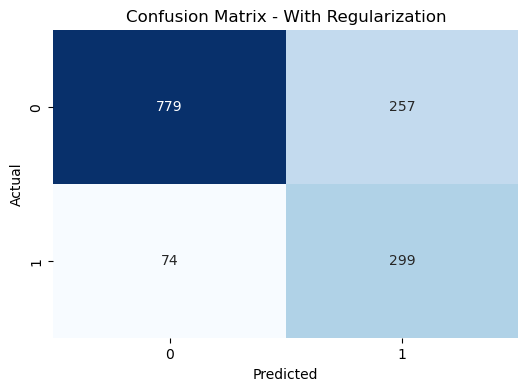

Classification Report with Regularization:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1036
           1       0.54      0.80      0.64       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.81      0.77      0.78      1409



In [94]:
from tensorflow.keras.layers import Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Rebuild the model with Dropout and L2 Regularization, using Input layer
def build_model_with_regularization():
    model = Sequential()

    # Input layer
    model.add(Input(shape=(X_train.shape[1],)))  # Explicit Input layer
    
    # First hidden layer with L2 regularization and dropout
    model.add(Dense(units=16, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))  # Dropout to prevent overfitting
    
    # Second hidden layer with L2 regularization and dropout
    model.add(Dense(units=8, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    
    # Output layer
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build and train the model with regularization
model_with_regularization = build_model_with_regularization()
history = model_with_regularization.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                                        class_weight=class_weights_dict)

# Evaluate the model
test_loss, test_acc = model_with_regularization.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy with Regularization: {test_acc}")

# Predictions
y_pred = (model_with_regularization.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - With Regularization")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report with Regularization:")
print(classification_report(y_test, y_pred))


In [98]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [104]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function to create the model, and accept learning_rate and optimizer as parameters
def create_model(optimizer='adam', learning_rate=0.01):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    # Create optimizer with dynamic learning_rate
    optimizer_instance = tf.keras.optimizers.get(optimizer)
    optimizer_instance.learning_rate = learning_rate

    # Compile the model
    model.compile(optimizer=optimizer_instance, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model for GridSearchCV
model = KerasClassifier(model=create_model, epochs=50, batch_size=32, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'model__learning_rate': [0.001, 0.01, 0.1],  # Note: 'model__' prefix is used to pass parameters to model creation function
    'batch_size': [32, 64, 128]
}

# Set up grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best Accuracy: {grid_result.best_score_} using {grid_result.best_params_}")


Best Accuracy: 0.7996095136670216 using {'batch_size': 64, 'model__learning_rate': 0.001, 'optimizer': 'rmsprop'}


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7202 - loss: 0.5625 - val_accuracy: 0.7544 - val_loss: 0.4625
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7592 - loss: 0.4637 - val_accuracy: 0.7913 - val_loss: 0.4359
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7777 - loss: 0.4498 - val_accuracy: 0.7935 - val_loss: 0.4283
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7810 - loss: 0.4516 - val_accuracy: 0.7984 - val_loss: 0.4214
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7873 - loss: 0.4388 - val_accuracy: 0.8055 - val_loss: 0.4170
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7984 - loss: 0.4328 - val_accuracy: 0.8112 - val_loss: 0.4144
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8103 - loss: 0.4136 - val_accuracy: 0.8112 - val_loss: 0.4132
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7963 - loss: 0.4297 - val_accuracy: 0.8119 - val_loss:

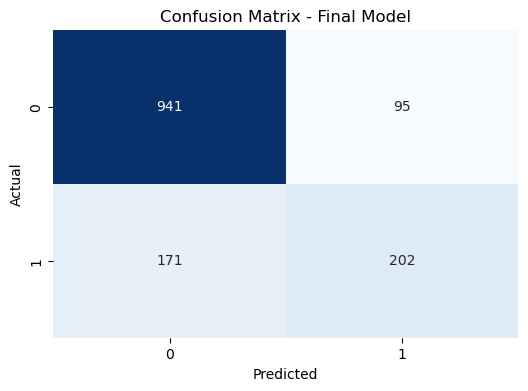

Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [106]:
# Final model with the best hyperparameters
def build_final_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    # Use RMSprop optimizer with learning rate = 0.001
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Build the final model
final_model = build_final_model()

# Train the model with batch size = 64
history = final_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate on test data
test_loss, test_acc = final_model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy: {test_acc}")

# Predictions and evaluation
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Final Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Final Model Classification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5601 - loss: 0.6853 - val_accuracy: 0.7289 - val_loss: 0.5708
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7479 - loss: 0.5374 - val_accuracy: 0.7438 - val_loss: 0.5068
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7668 - loss: 0.4896 - val_accuracy: 0.7438 - val_loss: 0.4959
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7705 - loss: 0.4811 - val_accuracy: 0.7410 - val_loss: 0.5009
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7663 - loss: 0.4798 - val_accuracy: 0.7452 - val_loss: 0.4825
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7732 - loss: 0.4801 - val_accuracy: 0.7459 - val_loss: 0.4843
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7791 - loss: 0.4693 - val_accuracy: 0.7537 - val_loss: 0.4747
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7816 - loss: 0.4610 - val_accuracy: 0.

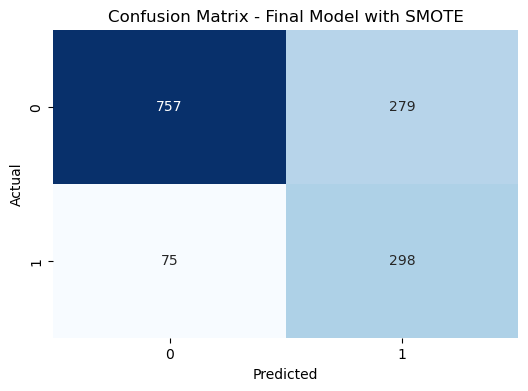

Final Model Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1036
           1       0.52      0.80      0.63       373

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.81      0.75      0.76      1409



In [108]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Train the final model with SMOTE applied data
final_model = build_final_model()

# Train the model using the oversampled data
history = final_model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = final_model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy with SMOTE: {test_acc}")

# Predictions and evaluation
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Final Model with SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Final Model Classification Report with SMOTE:")
print(classification_report(y_test, y_pred))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step


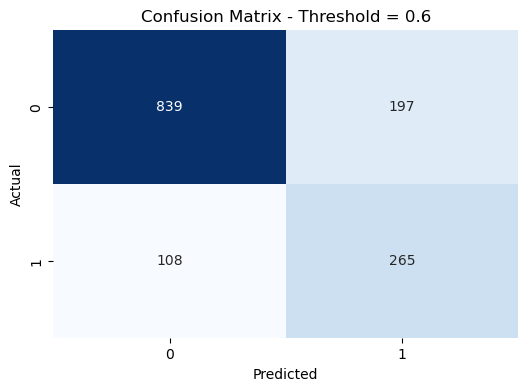

Classification Report with Threshold = 0.6:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1036
           1       0.57      0.71      0.63       373

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409



In [110]:
# Predict probabilities instead of class labels
y_pred_prob = final_model.predict(X_test)

# Set different thresholds and evaluate
threshold = 0.6  # Example of raising the threshold to 0.6
y_pred_adjusted = (y_pred_prob > threshold).astype("int32")

# Confusion Matrix and Classification Report with adjusted threshold
cm = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix - Threshold = {threshold}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Classification Report with Threshold = {threshold}:")
print(classification_report(y_test, y_pred_adjusted))


Evaluating with Threshold = 0.5


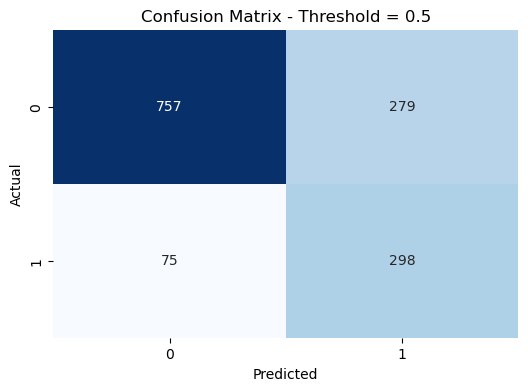

Classification Report with Threshold = 0.5:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1036
           1       0.52      0.80      0.63       373

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.81      0.75      0.76      1409

Accuracy: 0.7488
Precision: 0.5165
Recall: 0.7989
F1-score: 0.6274

Evaluating with Threshold = 0.55


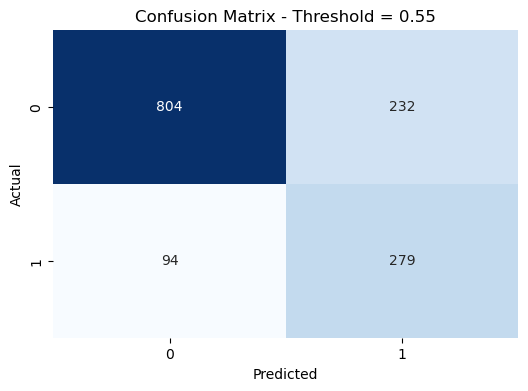

Classification Report with Threshold = 0.55:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1036
           1       0.55      0.75      0.63       373

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409

Accuracy: 0.7686
Precision: 0.5460
Recall: 0.7480
F1-score: 0.6312

Evaluating with Threshold = 0.6


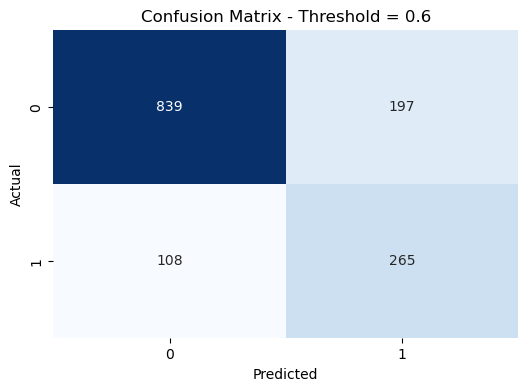

Classification Report with Threshold = 0.6:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1036
           1       0.57      0.71      0.63       373

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409

Accuracy: 0.7835
Precision: 0.5736
Recall: 0.7105
F1-score: 0.6347

Evaluating with Threshold = 0.65


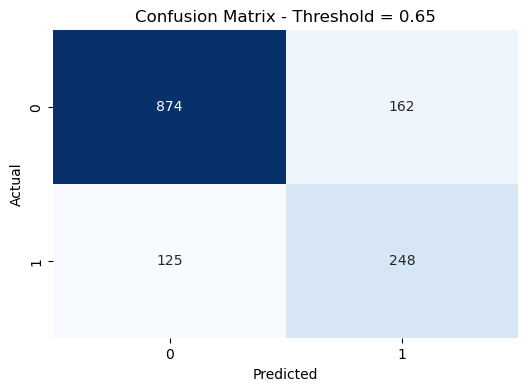

Classification Report with Threshold = 0.65:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1036
           1       0.60      0.66      0.63       373

    accuracy                           0.80      1409
   macro avg       0.74      0.75      0.75      1409
weighted avg       0.80      0.80      0.80      1409

Accuracy: 0.7963
Precision: 0.6049
Recall: 0.6649
F1-score: 0.6335

Evaluating with Threshold = 0.7


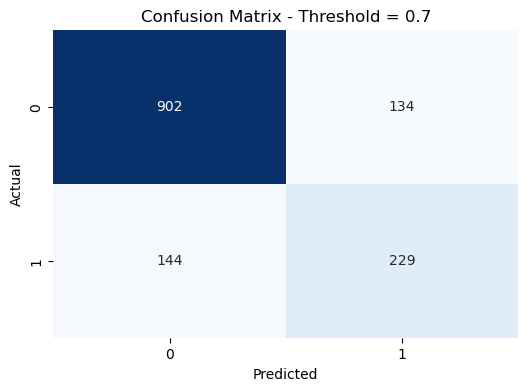

Classification Report with Threshold = 0.7:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1036
           1       0.63      0.61      0.62       373

    accuracy                           0.80      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.80      0.80      0.80      1409

Accuracy: 0.8027
Precision: 0.6309
Recall: 0.6139
F1-score: 0.6223


In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# List of thresholds to experiment with
thresholds = [0.5, 0.55, 0.6, 0.65, 0.7]

# Iterate over each threshold and evaluate the model performance
for threshold in thresholds:
    print(f"\nEvaluating with Threshold = {threshold}")
    
    # Adjust the threshold
    y_pred_adjusted = (y_pred_prob > threshold).astype("int32")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_adjusted)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - Threshold = {threshold}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print(f"Classification Report with Threshold = {threshold}:")
    print(classification_report(y_test, y_pred_adjusted))

    # Calculate accuracy, precision, recall, and F1-score manually
    accuracy = accuracy_score(y_test, y_pred_adjusted)
    precision = precision_score(y_test, y_pred_adjusted)
    recall = recall_score(y_test, y_pred_adjusted)
    f1 = f1_score(y_test, y_pred_adjusted)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")


In [118]:
# Ensure the model is trained (fit)
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

KerasClassifier(
	model=<function create_model at 0x000001879A9202C0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)


Confusion Matrix with Threshold = 0.7:
 [[939  97]
 [190 183]]

Classification Report with Threshold = 0.7:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409

Accuracy: 0.7963
Precision: 0.6536
Recall: 0.4906
F1-score: 0.5605


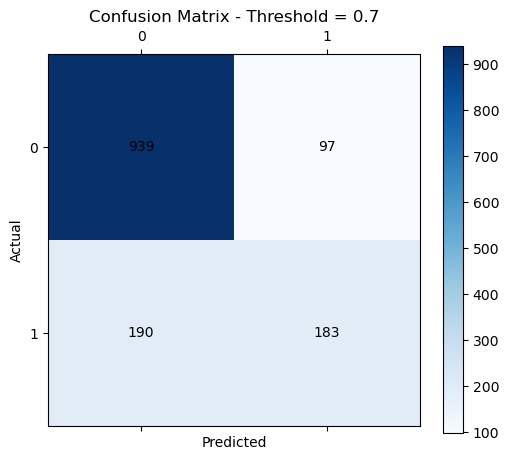


Confusion Matrix with Threshold = 0.75:
 [[939  97]
 [190 183]]

Classification Report with Threshold = 0.75:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409

Accuracy: 0.7963
Precision: 0.6536
Recall: 0.4906
F1-score: 0.5605


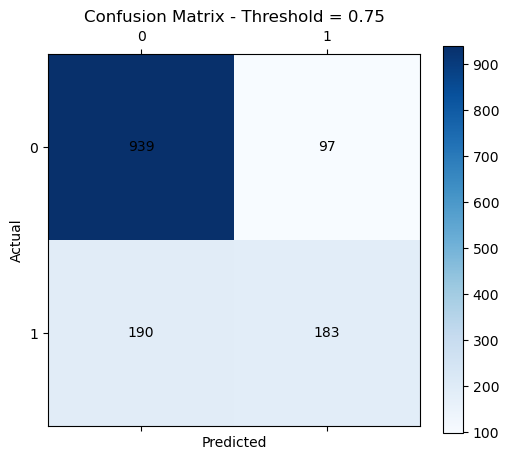


Confusion Matrix with Threshold = 0.8:
 [[939  97]
 [190 183]]

Classification Report with Threshold = 0.8:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409

Accuracy: 0.7963
Precision: 0.6536
Recall: 0.4906
F1-score: 0.5605


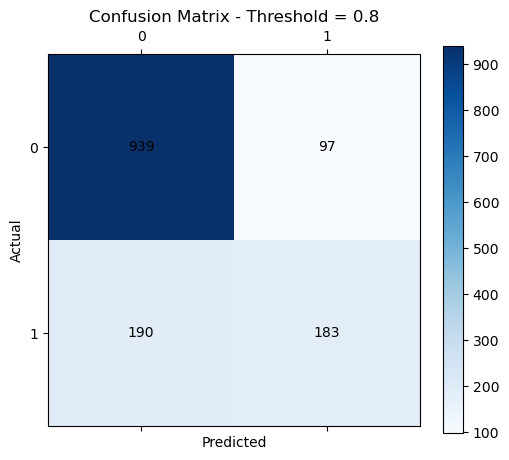

In [120]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Function to evaluate and display metrics for a given threshold
def evaluate_threshold(threshold, model, X_test, y_test):
    # Get the predicted probabilities
    y_pred_prob = model.predict(X_test)
    
    # Apply the threshold to generate binary predictions
    y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
    print(f"\nConfusion Matrix with Threshold = {threshold}:\n", conf_matrix)

    # Classification report
    report = classification_report(y_test, y_pred_adjusted)
    print(f"\nClassification Report with Threshold = {threshold}:\n", report)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred_adjusted)
    precision = precision_score(y_test, y_pred_adjusted)
    recall = recall_score(y_test, y_pred_adjusted)
    f1 = f1_score(y_test, y_pred_adjusted)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    plt.matshow(conf_matrix, cmap='Blues', fignum=1)
    plt.title(f'Confusion Matrix - Threshold = {threshold}')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(ticks=[0, 1], labels=['0', '1'])
    plt.yticks(ticks=[0, 1], labels=['0', '1'])
    for (i, j), val in np.ndenumerate(conf_matrix):
        plt.text(j, i, f'{val}', ha='center', va='center')
    plt.show()

# Try different thresholds
thresholds = [0.7, 0.75, 0.8]

for threshold in thresholds:
    evaluate_threshold(threshold, model, X_test, y_test)


In [124]:
from sklearn.utils import class_weight

# Ensure classes are in NumPy array format
classes = np.array([0, 1])

# Calculate the class weights based on the training labels
class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)

# Convert to dictionary format
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Fit the model with the computed class weights
model.fit(X_train, y_train, epochs=50, batch_size=32, class_weight=class_weight_dict, validation_data=(X_test, y_test))


KerasClassifier(
	model=<function create_model at 0x000001879A9202C0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5892 - loss: 5.4378 - val_accuracy: 0.7807 - val_loss: 1.1536
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6453 - loss: 1.4945 - val_accuracy: 0.2796 - val_loss: 15.5484
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6017 - loss: 5.1795 - val_accuracy: 0.7779 - val_loss: 1.7058
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6829 - loss: 2.0994 - val_accuracy: 0.3818 - val_loss: 7.6529
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6712 - loss: 1.8378 - val_accuracy: 0.7850 - val_loss: 1.0198
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6787 - loss: 1.8332 - val_accuracy: 0.7211 - val_loss: 0.6396
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7094 - loss: 0.9113 - val_accuracy: 0.6721 - val_loss: 0.7541
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6635 - loss: 1.5743 - val_accuracy: 

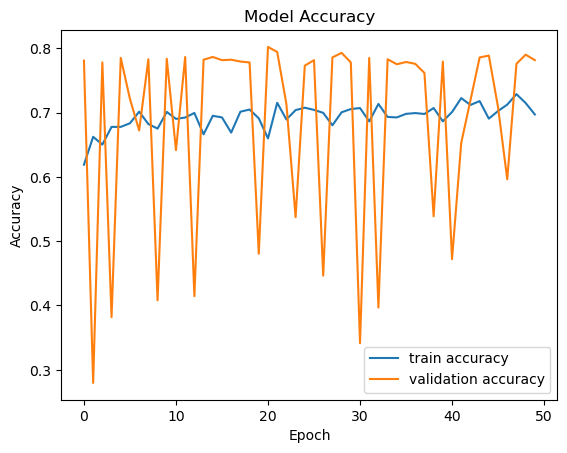

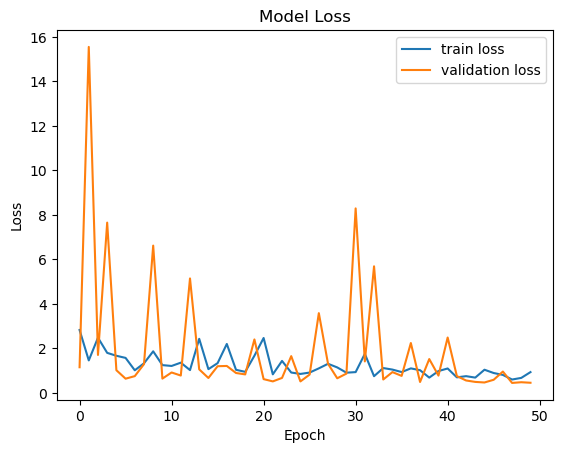

In [130]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming you already have your data loaded into X and y
# X, y = your_dataset_features, your_dataset_labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the classes are in NumPy array format
classes = np.array([0, 1])

# Calculate the class weights based on the training labels
class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)

# Convert to dictionary format
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Convert y_train and y_test to NumPy arrays if they're not already
y_train = np.array(y_train)
y_test = np.array(y_test)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Adjust input shape based on your data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the computed class weights
history = model.fit(X_train, y_train, epochs=50, batch_size=32, class_weight=class_weight_dict, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot accuracy and loss
def plot_history(history):
    # Plot accuracy
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    # Plot loss
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

# Call the plotting function
plot_history(history)
